In [1]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
from time import sleep
import re
import pandas as pd

browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
browser.get("https://www.pvoil.com.vn/tin-gia-xang-dau")

data = []
data2 = []
data3 = []
price_list = []

date = browser.find_elements(By.CLASS_NAME,"select-tabs.custom-select")
for row in date:
    data.append(row.text)
data2 = data[0].split('\n')
for i in data2:
    data3.append(re.sub(r'^\s+|\s+$', '', i))
data3.remove('')

for i in data3:
    sel = Select(browser.find_element(By.CLASS_NAME, "select-tabs.custom-select"))
    sel.select_by_index(data3.index(i))
    browser.find_element(By.XPATH,"/html/body/form/div[2]/main/div/section[2]/div/div/div/div[2]/div/select").click()
    time.sleep(2)
    price = browser.find_element(By.XPATH,"/html/body/form/div[2]/main/div/section[2]/div/div/div/div[3]/div/table/tbody/tr[3]/td[3]").text
#     print("date: {}, oil DO 0,05S-II: {}".format(i, price))
    price_list.append(price)

browser.close()



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/101.0.4951.41/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\tu.tong_onemount\.wdm\drivers\chromedriver\win32\101.0.4951.41]


In [2]:
final = pd.DataFrame([data3,price_list])
final = final.transpose()
final.columns=['Date','Price']
final.head()

,Date,Price
0,23/05/2022,25.550
1,11/05/2022,26.650
2,04/05/2022,25.530
3,21/04/2022,25.350
4,12/04/2022,24.380


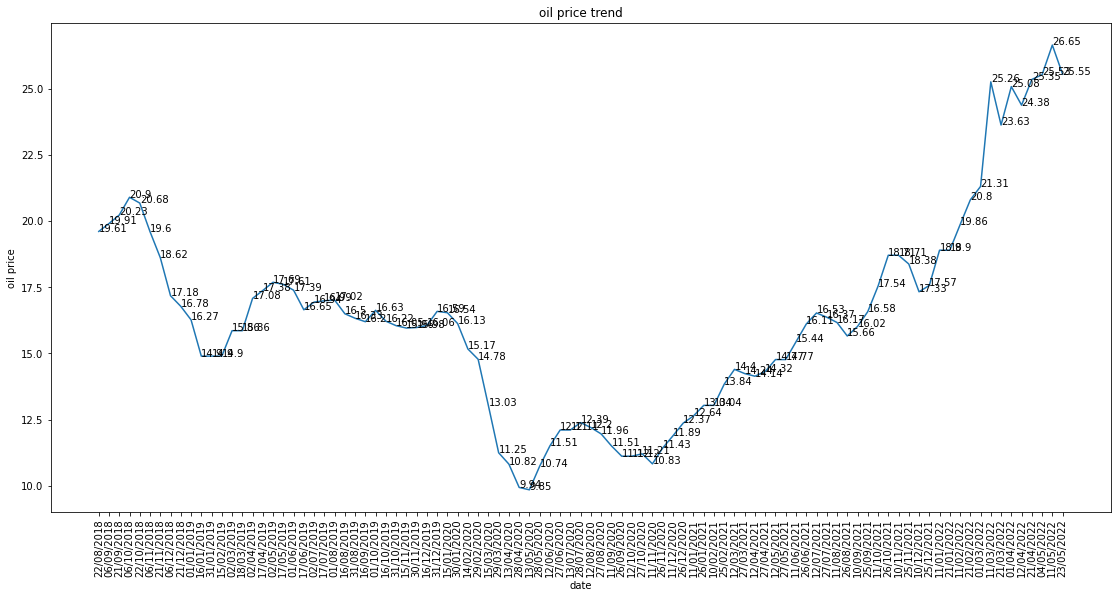

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.interpolate import make_interp_spline, BSpline

a = [datetime.datetime.strptime(i, "%d/%m/%Y").strftime('%Y-%m-%d') for i in data3]

a = list(reversed(data3))
b = list(reversed(list(np.float_(price_list))))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.figure(figsize=(19, 9))
plt.plot(a, b)
plt.xticks(rotation='90')
plt.title('oil price trend')
plt.xlabel('date')
plt.ylabel('oil price')
addlabels(a, b)
plt.show()